In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("matdata.csv", encoding='ISO-8859-1')

In [ ]:
df

,composition,hardness,load,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
0,Ag0.05Gd0.048Pd0.902,1.810,0.49,3,0.904659,0.902097,0.902000,0.902000,0.902000,46.914000,...,225,194,225.0,0.014527,0.000000,0.952040,0.033433,0,0.221199,0.021382
1,Ag0.05Y0.048Pd0.902,1.640,0.49,3,0.904659,0.902097,0.902000,0.902000,0.902000,45.714000,...,225,194,225.0,0.015030,0.000000,0.984970,0.000000,0,0.213451,0.020680
2,Ag0.25Pb0.5Sb0.25Te,0.578,2.94,4,0.586302,0.524792,0.503277,0.500565,0.500049,58.750000,...,225,152,152.0,0.102740,0.157534,0.547945,0.191781,1,0.039211,0.008038
3,Al1.5Si1.5N2.5O1.5,15.030,0.98,4,0.515079,0.421853,0.372438,0.361281,0.357785,10.000000,...,227,12,194.0,0.437500,0.562500,0.000000,0.000000,1,0.567090,0.204789
4,Al1.67B22,23.800,2.00,2,0.932121,0.929582,0.929447,0.929447,0.929447,5.564428,...,225,166,166.0,0.666667,0.333333,0.000000,0.000000,0,0.045173,0.005924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,Hf0.2Nb0.2Ta0.2Ti0.2Zr0.2C5,32.000,0.05,6,0.836660,0.833422,0.833333,0.833333,0.833333,13.266667,...,229,194,194.0,0.393333,0.333333,0.086667,0.186667,0,0.323366,0.072530
1118,Hf0.2Nb0.2Ta0.2Ti0.2V0.2C5,29.000,0.05,6,0.836660,0.833422,0.833333,0.833333,0.833333,12.700000,...,229,194,194.0,0.390728,0.331126,0.092715,0.185430,0,0.323366,0.065856
1119,Hf.2Nb0.2Ta0.2Ti0.2W0.2C5,31.000,0.05,6,0.836660,0.833422,0.833333,0.833333,0.833333,14.400000,...,229,194,194.0,0.355422,0.301205,0.090361,0.253012,0,0.323366,0.057248
1120,Nb0.2Ta0.2Ti0.2V0.2W0.2C5,28.000,0.05,6,0.836660,0.833422,0.833333,0.833333,0.833333,12.766667,...,229,194,194.0,0.385621,0.326797,0.104575,0.183007,0,0.240902,0.049522


In [ ]:
df.shape

(1122, 148)

In [ ]:
df.isna().any(axis=1).sum()

0

In [ ]:
for i in df.columns:
  print(i, end=" ")

composition hardness load NComp Comp_L2Norm Comp_L3Norm Comp_L5Norm Comp_L7Norm Comp_L10Norm mean_Number maxdiff_Number dev_Number max_Number min_Number most_Number mean_MendeleevNumber maxdiff_MendeleevNumber dev_MendeleevNumber max_MendeleevNumber min_MendeleevNumber most_MendeleevNumber mean_AtomicWeight maxdiff_AtomicWeight dev_AtomicWeight max_AtomicWeight min_AtomicWeight most_AtomicWeight mean_MeltingT maxdiff_MeltingT dev_MeltingT max_MeltingT min_MeltingT most_MeltingT mean_Column maxdiff_Column dev_Column max_Column min_Column most_Column mean_Row maxdiff_Row dev_Row max_Row min_Row most_Row mean_CovalentRadius maxdiff_CovalentRadius dev_CovalentRadius max_CovalentRadius min_CovalentRadius most_CovalentRadius mean_Electronegativity maxdiff_Electronegativity dev_Electronegativity max_Electronegativity min_Electronegativity most_Electronegativity mean_NsValence maxdiff_NsValence dev_NsValence max_NsValence min_NsValence most_NsValence mean_NpValence maxdiff_NpValence dev_NpVale

In [ ]:
# just hardness
X = df.drop(['hardness', 'composition'], axis=1)
y = df["hardness"]
df = df.drop(['composition'], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X)
scaled_data = scaler.transform(X)
X = pd.DataFrame(scaled_data, columns=X.columns)

scaler.fit(y.values.reshape(-1,1))
scaled_data = scaler.transform(y.values.reshape(-1,1))
y = pd.Series(scaled_data.flatten())

In [ ]:
a = df.corr()["hardness"]
result = a[(a>0.5) | (a<-0.5)]
result

hardness                1.000000
mean_Number            -0.636080
min_Number             -0.605562
most_Number            -0.658286
mean_MendeleevNumber    0.501191
mean_AtomicWeight      -0.605775
min_AtomicWeight       -0.579573
most_AtomicWeight      -0.636329
mean_Column             0.573493
most_Column             0.522055
mean_Row               -0.741507
maxdiff_Row             0.527630
min_Row                -0.656067
most_Row               -0.717834
mean_CovalentRadius    -0.774103
min_CovalentRadius     -0.625273
most_CovalentRadius    -0.693514
mean_NdValence         -0.688697
max_NdValence          -0.503355
most_NdValence         -0.676288
most_NValance          -0.572231
mean_NpUnfilled         0.781596
maxdiff_NpUnfilled      0.539871
max_NpUnfilled          0.598379
most_NpUnfilled         0.757080
most_NdUnfilled        -0.515500
min_NUnfilled           0.501374
mean_GSvolume_pa       -0.747415
min_GSvolume_pa        -0.614082
most_GSvolume_pa       -0.665909
mean_GSban

In [ ]:
abs(a.sort_values(ascending=False))[:20]

hardness                1.000000
mean_NpUnfilled         0.781596
most_NpUnfilled         0.757080
max_NpUnfilled          0.598379
mean_Column             0.573493
mean_GSbandgap          0.567742
maxdiff_NpUnfilled      0.539871
maxdiff_Row             0.527630
most_Column             0.522055
most_GSbandgap          0.508601
min_NUnfilled           0.501374
mean_MendeleevNumber    0.501191
mean_NsValence          0.496535
frac_sValence           0.493530
Comp_L10Norm            0.479833
Comp_L7Norm             0.478399
Comp_L5Norm             0.474392
max_MeltingT            0.464478
mean_MeltingT           0.462583
most_NsValence          0.460579
Name: hardness, dtype: float64

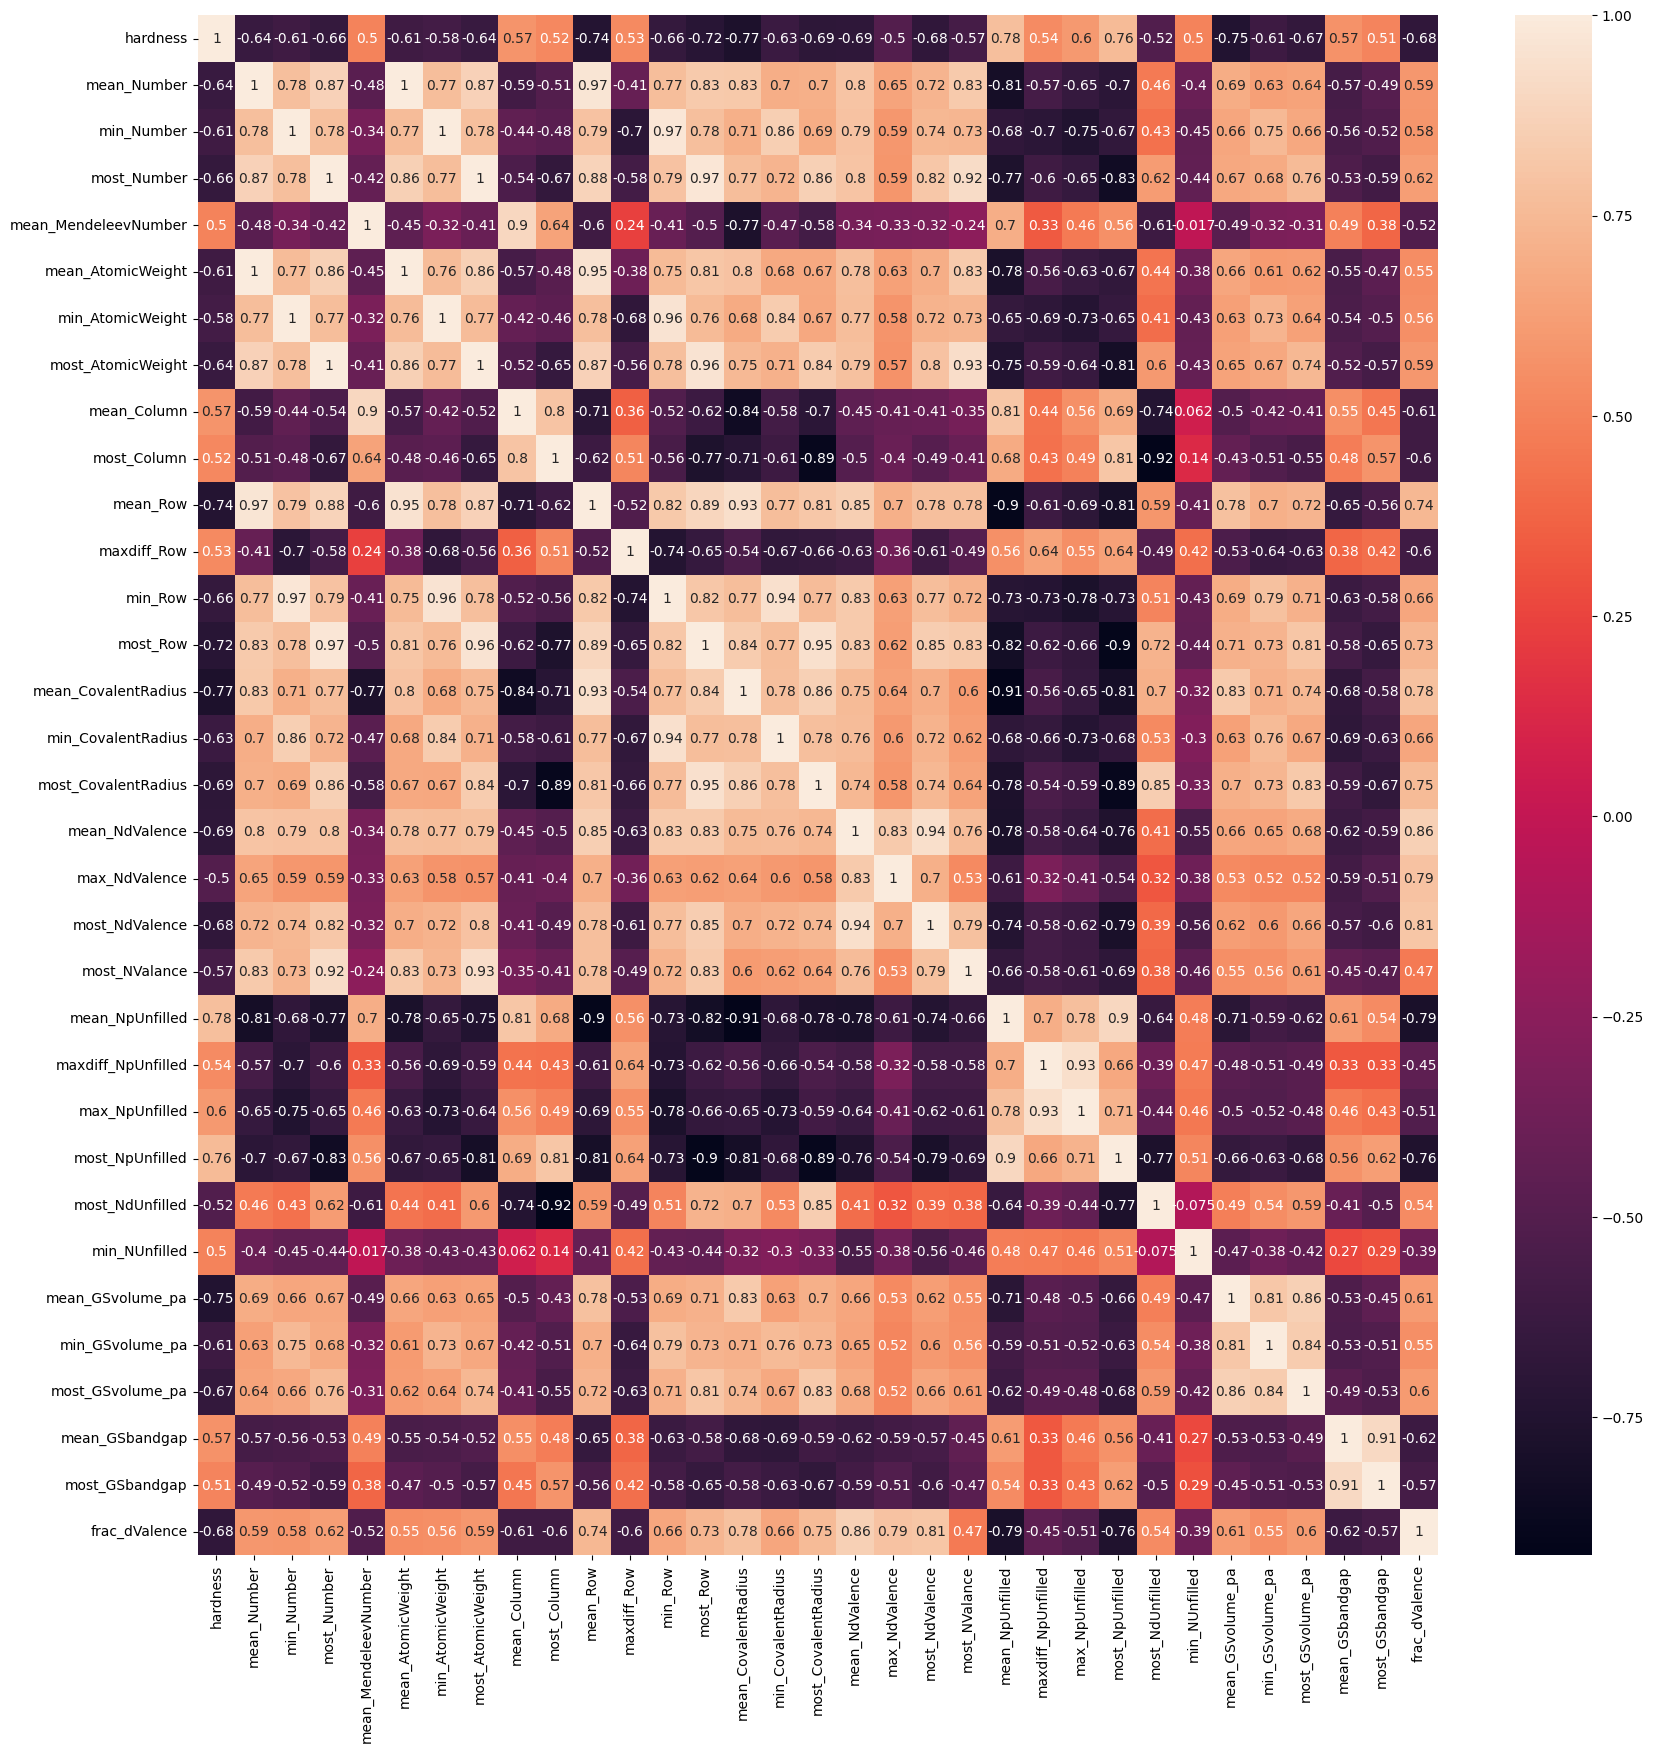

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df[result.keys().to_numpy()].corr(), annot=True, ax=ax)
plt.show()

In [ ]:
df = df[result.keys().to_numpy()]
X = df.drop(['hardness'], axis=1)
y = df['hardness']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_reg.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=200)
rf_regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=0)

In [ ]:
from sklearn.metrics import r2_score
y_pred = rf_regr.predict(X_test)

score = r2_score(y_test, y_pred)
print("r2_score : ", score)

r2_score :  0.7939320181638051


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold



In [ ]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=0),
    "Random Forest": RandomForestRegressor(max_depth=10, random_state=0, n_estimators=200)
}

# Perform cross-validation and evaluate models
cv_scores = {}
train_errors = {}
test_errors = {}

for model_name, model in models.items():
    # Perform cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cv_scores[model_name] = scores

    # Fit the model on the entire training set
    model.fit(X_train, y_train)

    # Evaluate on training set
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_errors[model_name] = {
        "R2 Score": train_r2,
        "MSE": train_mse,
        "MAE": train_mae
    }

    # Evaluate on test set
    y_test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_errors[model_name] = {
        "R2 Score": test_r2,
        "MSE": test_mse,
        "MAE": test_mae
    }

for model_name in cv_scores:
  print(f"{model_name} - R2 Score : {np.mean(cv_scores[model_name])}")

Linear Regression - R2 Score : 0.7141989364217652
Decision Tree - R2 Score : 0.7776571655410646
Random Forest - R2 Score : 0.8122450614317044


In [ ]:
cv_scores

{'Linear Regression': array([0.71706082, 0.6581661 , 0.73586288, 0.76248821, 0.69741668]),
 'Decision Tree': array([0.7809189 , 0.74877907, 0.76714064, 0.80018637, 0.79126085]),
 'Random Forest': array([0.80906352, 0.77567015, 0.81807323, 0.84025542, 0.81816298])}

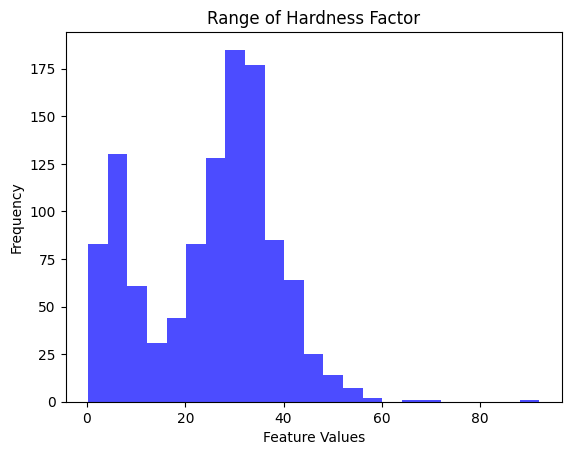

In [ ]:
import matplotlib.pyplot as plt

# Assuming your feature is stored in a list or array called 'feature'
feature = [2, 5, 3, 7, 6, 4, 8, 9, 1]

# Plotting the range of the feature
plt.hist(df["hardness"], bins='auto', color='blue', alpha=0.7)
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Range of Hardness Factor')
plt.show()

In [ ]:
df.head()

,hardness,mean_Number,min_Number,most_Number,mean_MendeleevNumber,mean_AtomicWeight,min_AtomicWeight,most_AtomicWeight,mean_Column,most_Column,...,max_NpUnfilled,most_NpUnfilled,most_NdUnfilled,min_NUnfilled,mean_GSvolume_pa,min_GSvolume_pa,most_GSvolume_pa,mean_GSbandgap,most_GSbandgap,frac_dValence
0,1.810,46.914000,46,46.0,60.470000,108.932250,106.42000,106.4200,9.714000,10.0,...,0,0.0,0.0,0,15.352720,14.4100,14.410000,0.000000,0.000,0.952040
1,1.640,45.714000,39,46.0,59.750000,105.651731,88.90585,106.4200,9.714000,10.0,...,0,0.0,0.0,0,15.367840,14.4100,14.410000,0.000000,0.000,0.984970
2,0.578,58.750000,47,52.0,84.000000,144.303525,107.86820,127.6000,14.750000,16.0,...,4,2.0,0.0,1,30.395417,16.3300,34.763333,0.232000,0.464,0.547945
3,15.030,10.000000,7,7.0,80.285714,20.230915,14.00670,14.0067,14.571429,15.0,...,5,3.0,0.0,2,15.137054,9.1050,14.768750,2.464571,6.437,0.000000
4,23.800,5.564428,5,5.0,72.070553,11.951887,10.81100,10.8110,13.000000,13.0,...,5,5.0,0.0,5,7.829176,7.1725,7.172500,1.416477,1.524,0.000000


In [ ]:
len(result)

33